# TUTORIAL <span style="color:orange;">***MASAÏ***</span><img width='64' style="float:right;margin:0 10px 0 20px;" src="images/masai.png" />

Back to the main [Index](Index.ipynb)

## Part 8. 2D EXSY processing

#### Various imports and graphics settings

In [191]:
from __future__ import print_function, division

#### Loading the <span style="color:orange;">***MASAÏ***</span> library

In [192]:
from masai.api import *

#### Set up the general location of data

In [193]:
import os
# You should set the MASAI environnement variable before running these exemples')
# or change the two following paths according to your installation
DATADIR = os.path.join(MASAI,'doc/tutorial/exemples')
FIGDIR = os.path.join(MASAI,'doc/tutorial/figures')

## Load and plot a 2D fid

In [194]:
user = 'user'
name = 'EXSY_STATES_TPPI'
expno = 10
path = os.path.join(DATADIR, user,'nmr',name, str(expno))
source = Bruker(path) 
source

***Bruker Source***
- path: /Users/christian/Dropbox/D.PROGRAMMES/masai/doc/tutorial/exemples/user/nmr/EXSY_STATES_TPPI/10
- datatype: 2D NMR SER
- pulse program: exchange.lcs
- Encoding: STATES-TPPI
- TD1: 512, TD2: 400
- F1 limits: 0.00 to 6.387 ms
- F2 limits: 0.00 to 39.900 ms

In [195]:
d8 = float(source.par.D[8])*1000.
print("D8 is the mixing time: %.2f ms"%d8)

D8 is the mixing time: 0.00 ms


## Process SER data

#### Process the first dimension

In [196]:
source = Bruker(path) 

# Make a broadening shifted to the TOP of echoes 
# **REMARKS:** This is possible in ``STATES`` mode only (TO CHECK!)

Process(source, transform = 'em 0 --k_shifted 1 0')

# Zerofilling ( zf n : means n times TD)
Process(source, transform = 'zf 2') 

# FT
Process(source, transform = 'ft')

# clip the region of interest
Process(source, transform = 'cl 0 12')

Exponential apodization lb:0.00
Zero-filling to si:2048
Fourier transform with si:2048
clipping along axis -1


Process
        Process a source

        Parameters
        ----------
        fd: source (such as NMR or IR source)
        transforms: str
            line(s) of commands among: em, zf, ft, pk, ab
            type Process(<command_name>) to get help on individual command

Manual phasing phc0:90.20, phc1:-42.90, pivot:9.20 
taking horizontal (axis=1) section by index at index 0


<IPython.core.display.Javascript object>


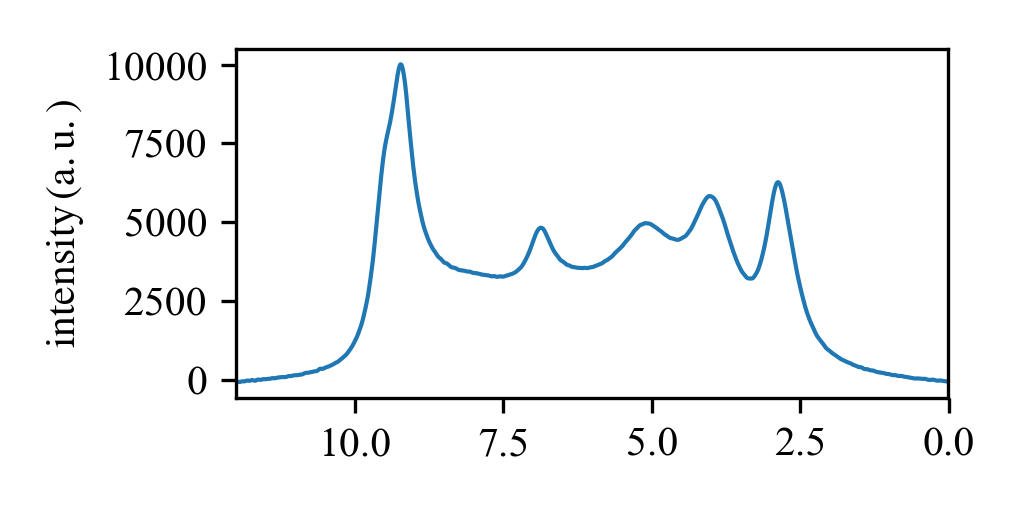

In [197]:
# Manually phasing and plot of the first row to check the phase
Process(source, transform = 'pk 90.2 -42.9 --pivot 9.2')
row = source.get_row(0, byindex=True)
p_1 = Plot1d(row, reverse=True)

In [198]:
proc = Process(source, transform = 'pk --interactive --pivot 9.2')

interactive(children=(FloatSlider(value=90.2, continuous_update=False, description=u'ph0', max=135.2, min=45.2, step=0.001), FloatSlider(value=-42.9, continuous_update=False, description=u'ph1', max=137.1, min=-222.9, step=0.01), FloatSlider(value=9.2, continuous_update=False, description=u'pivot', max=11.993645924808991, min=0.007048523286439234, step=0.001), Output()), _dom_classes=('widget-interact',))

In [199]:
# Apply the above interactive phase 
proc.apply()

Manual phasing phc0:90.20, phc1:-42.90, pivot:9.01 


<IPython.core.display.Javascript object>


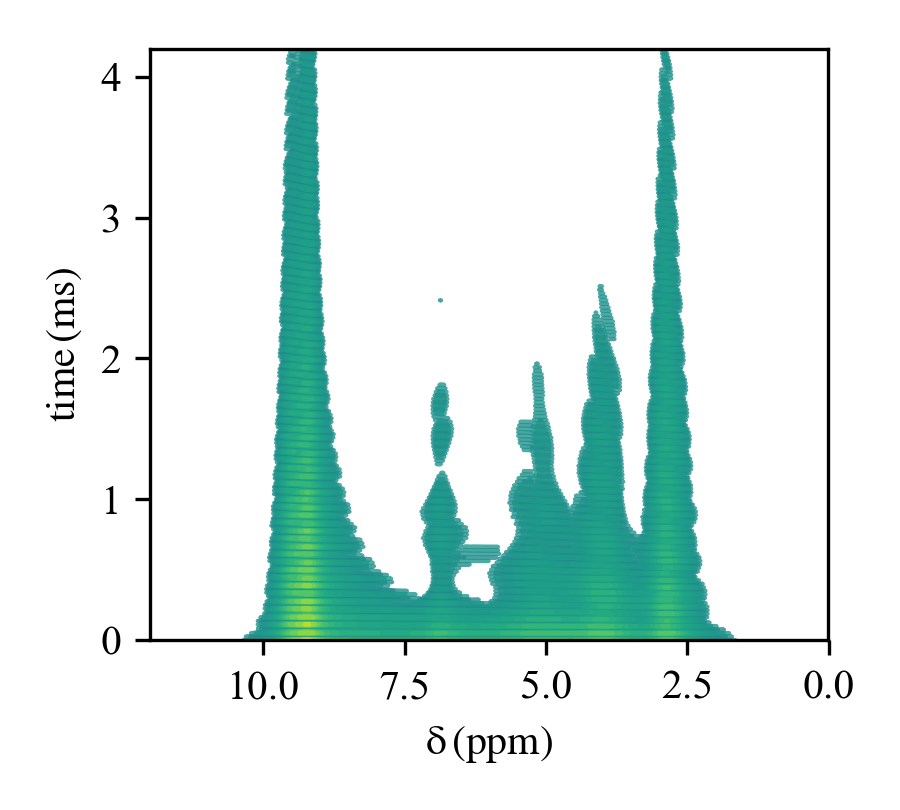

taking horizontal (axis=1) section by index at index 0


<IPython.core.display.Javascript object>


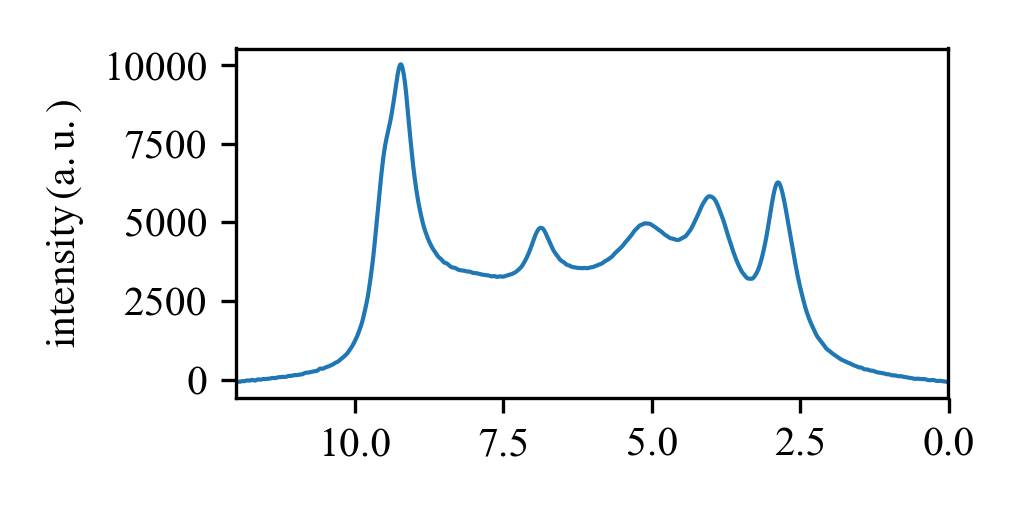

In [200]:
Plot2d(source, figsize=(3,2.7), ylim=(0,4.2))
row = source.get_row(0, byindex=True)
_ = Plot1d(row, reverse=True)

#### Process the second dimension

In [201]:
Process(source, axis=0, transform='em 0')
Process(source, axis=0, transform='zf 2') 

Process(source, axis=0, transform='ft')

Exponential apodization lb:0.00
Zero-filling to si:2048
Data transformed according to encoding STATES-TPPI
Fourier transform with si:2048


Process
        Process a source

        Parameters
        ----------
        fd: source (such as NMR or IR source)
        transforms: str
            line(s) of commands among: em, zf, ft, pk, ab
            type Process(<command_name>) to get help on individual command

clipping along axis 0
Manual phasing phc0:15.23, phc1:-66.72, pivot:9.20 
taking vertical (axis=0) section by position at 9.25


<IPython.core.display.Javascript object>


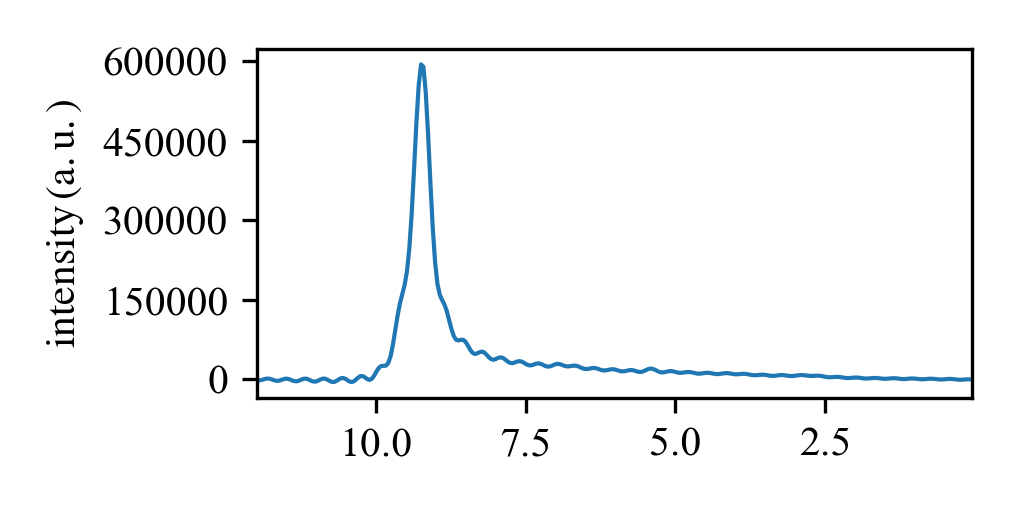

In [202]:
# clip the region of interest
Process(source, axis=0, transform = 'cl 0 12')

Process(source, axis=0, transform='pk 15.23 -66.72 --pivot 9.2') #manual phasinf first needed
row = source.get_col(9.25, width=0.)
p_1 = Plot1d(row, reverse=True)

In [204]:
proc2 = Process(source, axis=0, transform = 'pk --interactive 2.7 5 9.2')

interactive(children=(FloatSlider(value=15.23, continuous_update=False, description=u'ph0', max=60.230000000000004, min=-29.77, step=0.001), FloatSlider(value=-66.72, continuous_update=False, description=u'ph1', max=113.28, min=-246.72, step=0.01), FloatSlider(value=9.2, continuous_update=False, description=u'pivot', max=11.97898804940175, min=0.0607738441389003, step=0.001), Output()), _dom_classes=('widget-interact',))

In [205]:
# Apply the above interactive phase 
proc2.apply()

Manual phasing phc0:15.23, phc1:-66.72, pivot:9.20 


<IPython.core.display.Javascript object>


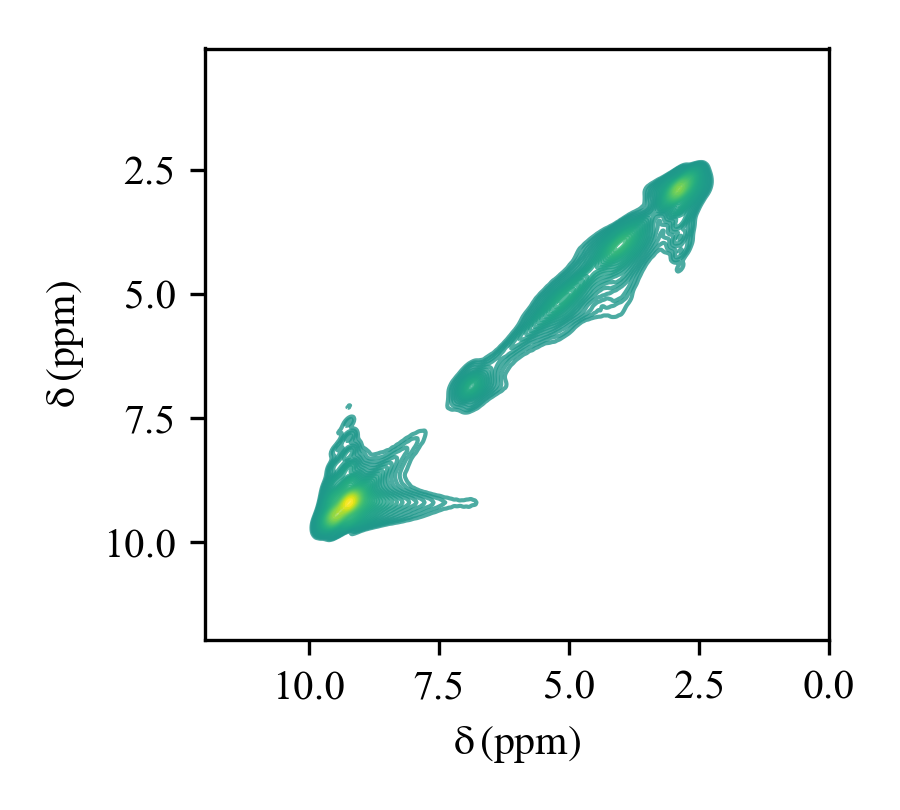

taking vertical (axis=0) section by position at 9.20


<IPython.core.display.Javascript object>


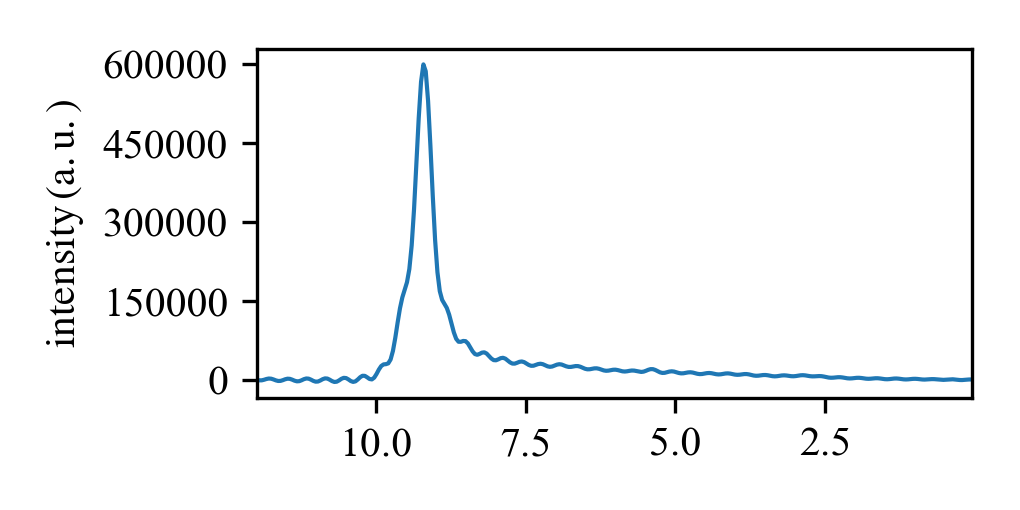

In [209]:
# display 2d

Plot2d(source, figsize=(3,2.7), exponent=1.1, nc=20)
row = source.get_col(9.2)
_ = Plot1d(row, reverse=True)

Manual phasing phc0:15.23, phc1:-66.72, pivot:9.20 
(1024, 1024)


<IPython.core.display.Javascript object>


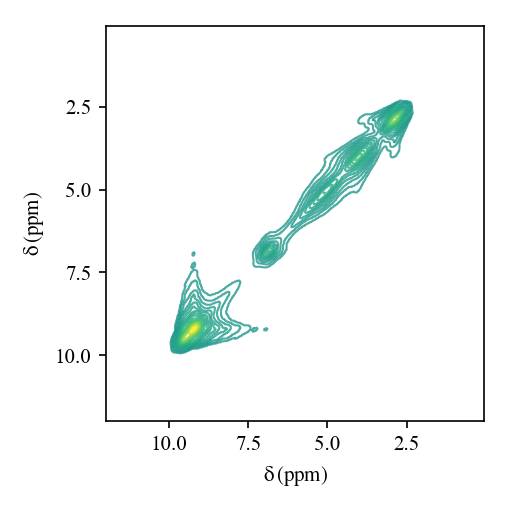

In [190]:
# symetrisation

data = source.data.copy()
index= np.linspace(max(min(data.index), min(data.columns)),min(max(data.index), max(data.columns)),1024)
data = data.reindex(index = index, columns = index, method='nearest')
backup = source.copy()
print(data.shape)
backup.data = data + data.T
Plot2d(backup)